In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

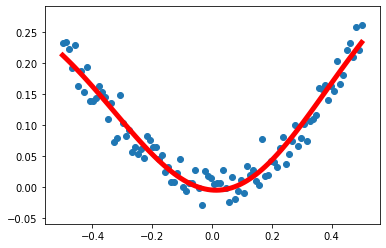

In [2]:
# 使用numpy生成200个随机点（样本）
x_data = np.linspace(-0.5,0.5,100)[:,np.newaxis]# 从-0.5到0.5区间产生200个点，这200个点均匀分布，一维数据。因为要使用二维数据，因此加一个维度(200*1)
noise = np.random.normal(0,0.02,x_data.shape)# 正态分布，方差为0.02
y_data = np.square(x_data) + noise

# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])# 任意的形状，行不确定，列只有1列，跟样本对应
y = tf.placeholder(tf.float32,[None,1])

# 定义神经网络中间层
Weight_L1 = tf.Variable(tf.random_normal([1,10])) # 形状：一行10列。1：1个输入，10：10个输出。因为输入层为一个神经元，中间层是10个神经元
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weight_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1) # 中间层的输出 tanh为激活函数


# 定义输出层
Weight_L2 = tf.Variable(tf.random_normal([10,1]))
biase_L2 = tf.Variable(tf.zeros([1,1])) # 1 * 10 ，10* 1 最后为一个数 画个图就出来了
Wx_plus_b_L2 = tf.matmul(L1,Weight_L2)+biase_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
# 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

# 定义会话
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
        
    # 在测试集上得到预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data}) 
    
    # 画图
    plt.figure()
    plt.scatter(x_data,y_data) # 真实值的散点图
    plt.plot(x_data,prediction_value,'r-',lw=5)# 预测值的函数图 'r-'：红色实线，lw：线宽为5
    plt.show()
        